<a href="https://colab.research.google.com/github/sabhinav3/Intro_to_ML/blob/main/ml_assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

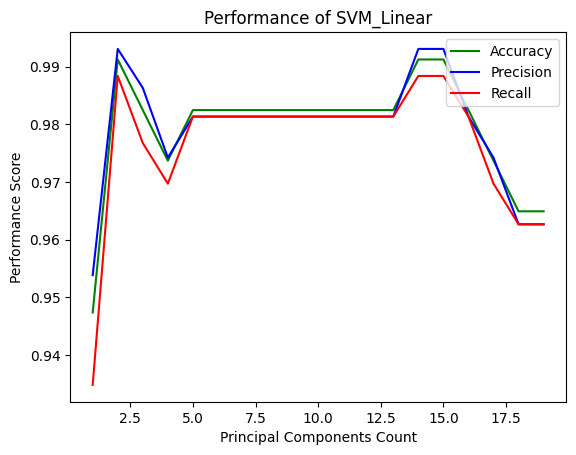

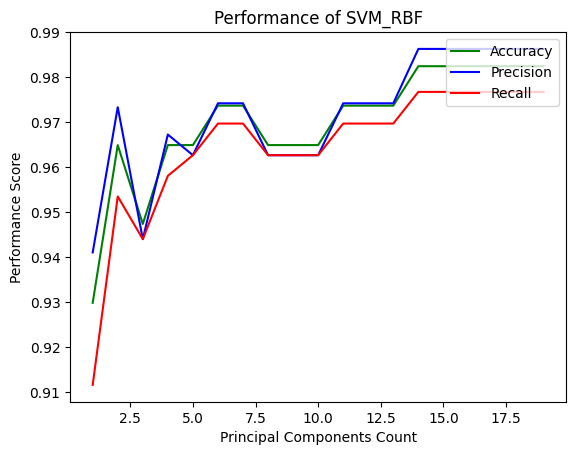

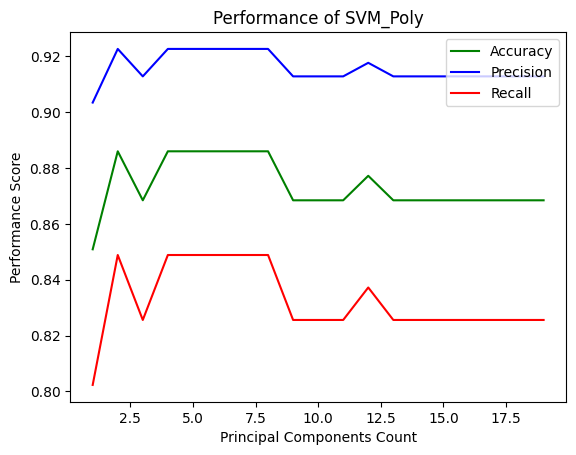

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.decomposition import PCA
from sklearn.datasets import load_breast_cancer

# Loading dataset
dataset = load_breast_cancer()
features, labels = dataset.data, dataset.target

# Splitting data into training and test sets
normalizer = StandardScaler()
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.2, random_state=42)
normalized_train_features = normalizer.fit_transform(features_train)
normalized_test_features = normalizer.transform(features_test)

# SVM Classifiers
svm_classifiers = {
    'SVM_Linear': SVC(kernel='linear'),
    'SVM_RBF': SVC(kernel='rbf'),
    'SVM_Poly': SVC(kernel='poly')
}

# Range of Principal Components
principal_components_range = np.arange(1, 20, 1)

# Plotting results
for classifier_name, svm_classifier in svm_classifiers.items():
    list_accuracy, list_precision, list_recall = [], [], []

    for n_components in principal_components_range:
        pca_transformer = PCA(n_components=n_components, random_state=0)
        pca_train_features = pca_transformer.fit_transform(normalized_train_features)
        pca_test_features = pca_transformer.transform(normalized_test_features)

        svm_classifier.fit(pca_train_features, labels_train)
        label_predictions = svm_classifier.predict(pca_test_features)

        list_accuracy.append(accuracy_score(labels_test, label_predictions))
        list_precision.append(precision_score(labels_test, label_predictions, average='macro'))
        list_recall.append(recall_score(labels_test, label_predictions, average='macro'))

    plt.figure()
    plt.plot(principal_components_range, list_accuracy, 'g-', label='Accuracy')
    plt.plot(principal_components_range, list_precision, 'b-', label='Precision')
    plt.plot(principal_components_range, list_recall, 'r-', label='Recall')
    plt.xlabel('Principal Components Count')
    plt.ylabel('Performance Score')
    plt.legend(loc='upper right')
    plt.title(f'Performance of {classifier_name}')
    plt.show()
